# Week 3
## Part 1: Small world networks

**What's the problem with random networks as a model for real-world networks according to the argument in section 3.5 (near the end)?**

Random networks predict the standard deviation of the degree distribution is much smaller than observed. It predicts a majority of nodes to like close to \<k\>, witch very few outliers. In reality, there are many more outliers than predicted.

**List the four regimes that characterize random networks as a function of ⟨k⟩.**

1. _Subctitical Regime_: 0 < \<k\> < 1 (p < 1/N)
2. _Critical Point_: \<k\> = 1 (p = 1/N)
3. _Supercritical Regime_: \<k\> > 1 (p > 1/N)
4. _Connected Regime_: \<k\> > ln(N) (p > ln(N)/N)

**According to the book, why is it a problem for random networks (in terms of being a model for real-world networks) that the degree-dependent clustering C(k)
 decreases as a function of k
 in real-world networks?**

In a random network, the clustering coefficient is independent of the the nodes degree and dependent on the system size (N); whereas in real networks, the clustering coefficient is dependent on \<k\> (decreasing) and is largly independent of the system size (N).

In [48]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

**Use nx.watts_strogatz_graph to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity p=0,0.1,
and 1
. Calculate the average shortest path length ⟨d⟩
 for each one. Describe what happens to the network when p=1
.**

In [14]:
N = 500
k = 4
for p in (0, 0.1, 1):
  wsg = nx.watts_strogatz_graph(n=N, k=k, p=p)
  print(f"The average shortest path for p={p} is {nx.average_shortest_path_length(wsg)}")

d = np.log(N)/np.log(k) # Average shortest path in a random network
print(f"The average shortest path for a random network is {d}")

The average shortest path for p=0 is 62.875751503006015
The average shortest path for p=0.1 is 8.148521042084168
The average shortest path for p=1 is 4.787310621242485
The average shortest path for a random network is 4.4828921423310435


When p=1, all links have been rewired and therefore the graph is a random network. This is confirmed in comparing the average shortest path calculated when p=1 and the expected average shortest path for that of a random network.

**Generate a lot of networks with different values of p
. You will notice that paths are short when p
 is close to one and they are long when p=0
. What's the value of p
 for which the average shortest path length gets close to the short paths we find in a fully randomized network (i.e. the value you find when p=1
).**

In [29]:
for p in np.linspace(0, 1, 20):
  wsg = nx.watts_strogatz_graph(n=N, k=k, p=p)
  print(f"The average shortest path for p={p} is {nx.average_shortest_path_length(wsg)}")

print(f"The average shortest path for a random network is {d}")

The average shortest path for p=0.0 is 62.875751503006015
The average shortest path for p=0.05263157894736842 is 9.522749498997996
The average shortest path for p=0.10526315789473684 is 7.741939879759519
The average shortest path for p=0.15789473684210525 is 6.498533066132264
The average shortest path for p=0.21052631578947367 is 6.119134268537074
The average shortest path for p=0.2631578947368421 is 5.660817635270541
The average shortest path for p=0.3157894736842105 is 5.403278557114229
The average shortest path for p=0.3684210526315789 is 5.224144288577154
The average shortest path for p=0.42105263157894735 is 5.130637274549098
The average shortest path for p=0.47368421052631576 is 5.0079679358717435
The average shortest path for p=0.5263157894736842 is 4.941811623246493
The average shortest path for p=0.5789473684210527 is 4.905370741482966
The average shortest path for p=0.631578947368421 is 4.845739478957916
The average shortest path for p=0.6842105263157894 is 4.778677354709419


Already at p = 0.05, the average shortest path distance is in the same order of magnitude as that of a random network.

**Let's investigate this behavior in detail. Generate 50 networks with N=500
, ⟨k⟩=4
, for each of p={0,0.01,0.03,0.05,0.1,0.2}
. Calculate the average of ⟨d⟩
 as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add errorbars to the plot. My version of the plot is below (since a picture's worth 1000 words).**

In [42]:
N = 500
k = 4
ps = (0, 0.01, 0.03, 0.05, 0.1, 0.2)
ds = {}

# Populate a dictionary containing a list of average shortest paths for 50 networks for each p
for p in ps:
  for x in range(50):
    if p not in ds:
      ds[p] = []
    wsg = nx.watts_strogatz_graph(N, k, p)
    ds[p].append(nx.average_shortest_path_length(wsg))


In [47]:
averages = {key:np.mean(value) for (key, value) in ds.items()}
standard_deviations = {key:np.std(value) for (key, value) in ds.items()}

for p in ps:
  print(f"the mean and std.dev for p={p} is {averages[p]}, {standard_deviations[p]} ")


the mean and std.dev for p=0 is 62.87575150300602, 7.105427357601002e-15 
the mean and std.dev for p=0.01 is 23.12951054108216, 4.339864803644418 
the mean and std.dev for p=0.03 is 13.564032224448898, 1.3386971975858781 
the mean and std.dev for p=0.05 is 10.260656352705409, 0.6815856378490083 
the mean and std.dev for p=0.1 is 7.711944368737476, 0.2959186889800614 
the mean and std.dev for p=0.2 is 6.129484569138276, 0.12493572839718675 


[Text(0.5, 0, 'p'),
 Text(0, 0.5, '<k>'),
 Text(0.5, 1.0, 'Watts-Strogatz Networks')]

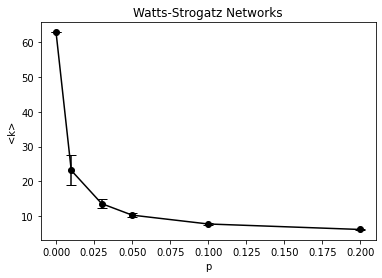

In [93]:
fig, ax = plt.subplots()
ax.errorbar(ps, averages.values(), yerr=standard_deviations.values(), capsize=5, color="black", marker="o", linestyle="solid")
ax.set(xlabel="p", ylabel="<k>", title="Watts-Strogatz Networks")

## Part 2: Scale-free Networks

**What are the three slope dependent regimes of complex networks with power-law degree distributions? Briefly describe each one.**

1. _Anomalous Regime (ɣ<=2)_ - Average degree diverges; For sufficiently larfe N the degree of the largest hub must exceed the total number of noes in the network. Hence, no large networks can exist in this regime.
2. _Scale Free Regime (2<ɣ<3)_ - The first moment is finite but the second and higher diverge. Networks in the regime are ultra-small, predicting that k<sub>max</sub> grows with the network with exponent 1(ɣ-1)
3. _Random Network Regime (ɣ>3)_ - Here, both the first and second moment are finite and networks in this regime are difficult to distinguish from random networks.

**What are the three regimes we find in non-linear preferential attachement? (chapter 5) Briefly describe each one.**

1. _No Preferential Attachment (α=0)_ - The network has a basic exponential degree distribution. There are no hubs and the netork is similar to a random one.
2. _Sublinear Preferential Attachment (0 < α < 1)_ - For any α > 0 new nodes favor the more connected nodes over the less connected nodes. Yet, for α < 1 the bias is weak, not sufficient to generate a scale-free degree distribution. There are fewer and smaller hubs than in a scale-free network.
3. _Superlinear Preferential Attachment (α > 1)_ - The high-degree nodes are disproportionately attractive. A winner-takes-all dynamics leads to a hub-and-spoke topology. Early nodes become super hubs and subsequent nodes link to them.

**We're going to create our own Barabasi-Albert model (a special case) in right in a notebook. Follow the recipe below for success:**

**First create a graph consisting of a single link. (You can call the nodes anything, but I would simply use integers as names).**

In [128]:
import itertools
import random

In [144]:
G = nx.Graph()
G.add_edge(1,2)

# Build a barabasi network. We use a flattened edge list to achieve preferential attachment
def build_barabasi_graph(graph, start, end):
  for x in range(start,end+1):
    edges = list(G.edges())
    flattened = list(itertools.chain(*edges))
    G.add_edge(x, random.choice(flattened))

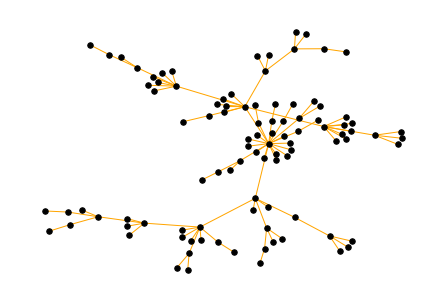

In [145]:
build_barabasi_graph(G, 3, 100)
nx.draw(G, node_size=30, node_color="black", edge_color="orange")

**Add more nodes until you have a 5000 node network.**

In [146]:
build_barabasi_graph(G, 101, 5000)

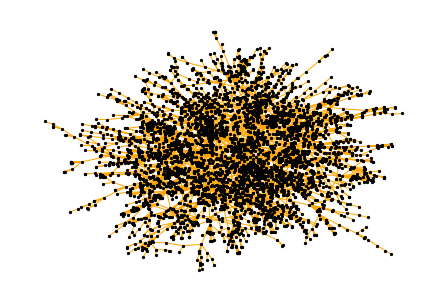

In [148]:
nx.draw(G, node_size=5, node_color="black", edge_color="orange")

In [154]:
degrees = [y for x,y in G.degree]
print(f"The max degree of G is {max(degrees)}")
print(f"The min degree of G is {min(degrees)}")

The max degree of G is 115
The min degree of G is 1


In [176]:
v = np.unique(degrees)
hist, bins = np.histogram(degrees, v)

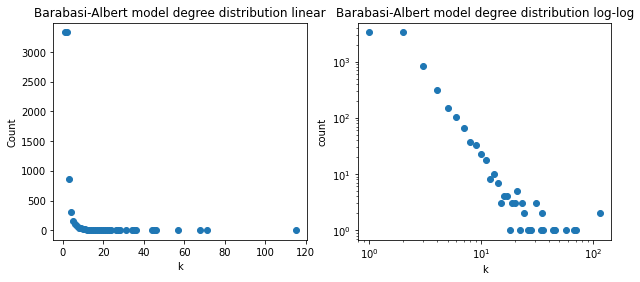

In [212]:
fig = plt.figure(figsize=(10,4))
plt.subplot(121)
plt.plot(bins, np.insert(hist, 0, hist[0]), "o")
plt.xlabel('k')
plt.ylabel('Count')
plt.title('Barabasi-Albert model degree distribution linear')

# Log axes
plt.subplot(122)
plt.plot(bins, np.insert(hist, 0, hist[0]), 'o')
plt.xlabel('k')
plt.ylabel('count')

plt.title('Barabasi-Albert model degree distribution log-log')
plt.xscale('log')
plt.yscale('log')